# Text Analytics
Question 2:

Discuss the concept and application of Text Analytics (eg text categorisation, topic modelling and document summarisation) using machine learning modelling by providing a real-world data set of social media posts. 

Apply appropriate text analytics tools to the chosen dataset. 

In [3]:
#Import the libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords


In [4]:
# Load data set
df = pd.read_json('tweets.json', lines=True)

In [5]:
#looking at the first 20 rows of the data set
print(df.head(20))

     keyword  likes                                              tweet
0   COVID-19      1  The headline kinda makes it sound like the AP ...
1   COVID-19      0  ATLANTIC CITY — The city's Police Athletic Lea...
2   COVID-19      0  I feel like Diana's line she draws is if his s...
3   COVID-19      1  COVID-19 was the single most fatal communicabl...
4   COVID-19      0  Studies: Dogs can detect COVID-19 with greater...
5   COVID-19      1  Now you're putting a lot of different things o...
6   COVID-19      0  Wow,how can you forget the KEMSA scandals whic...
7   COVID-19      0  The hardest thing to change are people's minds...
8   COVID-19      0                                    unroll #COVID19
9   COVID-19      0  Hidden in plain sight, the truth about Covid-1...
10  COVID-19      0                                    unroll #COVID19
11  COVID-19     23  DO NO HARM - OR 'SAVING' THEMSELVES?On March 1...
12  COVID-19     10  Well dogs reportedly can sniff out cancer an a...
13  CO

In [6]:
# Check for missing values
print(df.isnull().sum())

keyword    0
likes      0
tweet      0
dtype: int64


In [7]:
print(df.columns)

Index(['keyword', 'likes', 'tweet'], dtype='object')


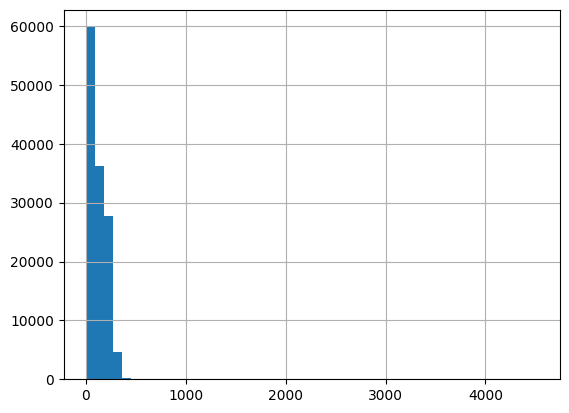

In [8]:
#Now lets analyze the tweet length
df['tweet_length'] = df['tweet'].apply(len)
df['tweet_length'].hist(bins=50)
plt.show()


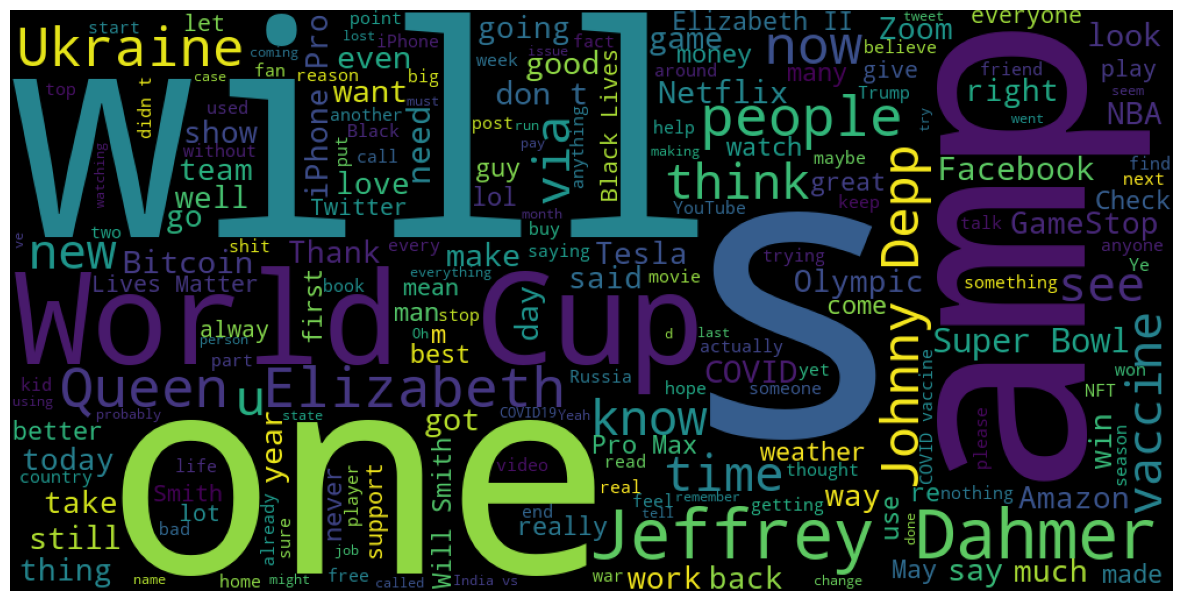

In [9]:
# Word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(df['tweet']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [14]:
categories = [
    'World Cup',
    'Facebook',
     'NBA',
    'Ukraine',
]

In [15]:
categories = ['World Cup', 'Facebook', 'NBA', 'Ukraine']

# Create a new column for each category
for category in categories:
    df[category] = df['tweet'].apply(lambda x: 1 if category in x else 0)

In [17]:
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the stop words
stop_words = set(stopwords.words('english'))

# Define a function to remove stop words
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.casefold() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to the 'tweet' column for each category
for category in categories:
    df.loc[df[category] == 1, 'tweet'] = df.loc[df[category] == 1, 'tweet'].apply(remove_stop_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mecunnin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [18]:
# Get the English stop words
stop_words = set(stopwords.words('english'))

# Convert the set to a list
stop_words = list(stop_words)

# Initialize a CountVectorizer with the stop words
vectorizer = CountVectorizer(stop_words=stop_words)

# Apply the vectorizer to the 'tweet' column
X = vectorizer.fit_transform(df['tweet'])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Assuming 'likes' is your target variable
y = df['likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
report_cv = classification_report(y_test, y_pred)
print(report_cv)

              precision    recall  f1-score   support

           0       0.53      0.90      0.67     19642
           1       0.22      0.14      0.17      7253
           2       0.13      0.03      0.05      3139
           3       0.09      0.01      0.01      1771
           4       0.15      0.00      0.01      1066
           5       0.11      0.00      0.01       780
           6       0.00      0.00      0.00       557
           7       0.00      0.00      0.00       409
           8       0.00      0.00      0.00       327
           9       0.00      0.00      0.00       293
          10       0.00      0.00      0.00       203
          11       0.00      0.00      0.00       204
          12       0.00      0.00      0.00       180
          13       0.00      0.00      0.00       137
          14       0.00      0.00      0.00       137
          15       0.00      0.00      0.00       120
          16       0.00      0.00      0.00       113
          17       0.00    

c:\Users\mecunnin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mecunnin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mecunnin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

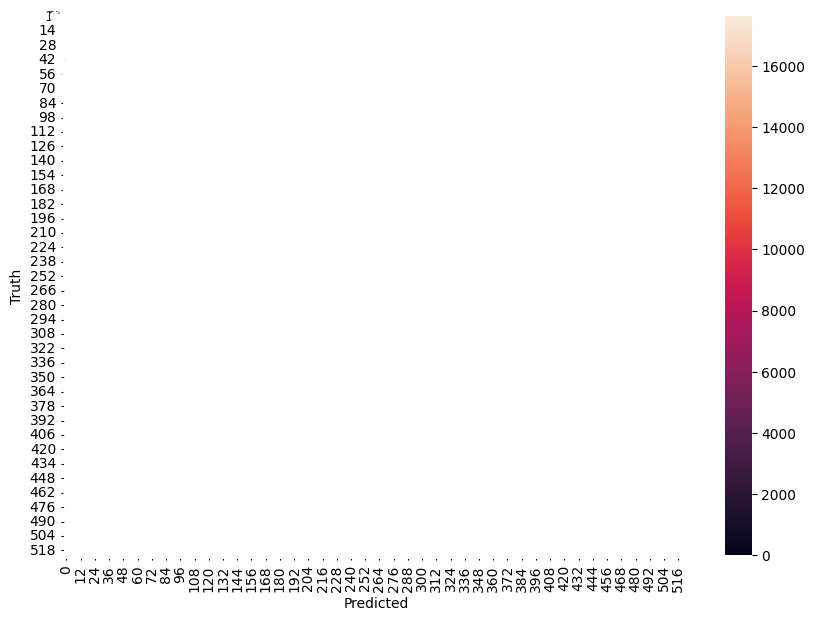

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cnf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [21]:
# Print confusion matrix
print(cnf_matrix)

[[17634  1725   223 ...     0     0     0]
 [ 6121  1000    98 ...     0     0     0]
 [ 2607   428    86 ...     0     0     0]
 ...
 [    1     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]
 [    1     0     0 ...     0     0     0]]


In [22]:
for category in categories:
    print(f"{category}: {df[category].sum()}")

World Cup: 3333
Facebook: 3939
NBA: 3330
Ukraine: 4840
